In [1]:
import pandas as pd
import numpy as np
import pickle
import json

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Step1 : Problem Statement

### Step2: Data Gathering

In [2]:
df = pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


### Step3: EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [5]:
df.duplicated().sum()   # Check for duplicate values

0

### Step4 : Feature Engineering

In [6]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df["Ram"] = df["Ram"].str.replace("GB","").astype(float)

In [9]:
df["Ram"] = df["Ram"].astype(int)

In [10]:
df["Weight"]= df["Weight"].str.replace("kg","").astype(float)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


### Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

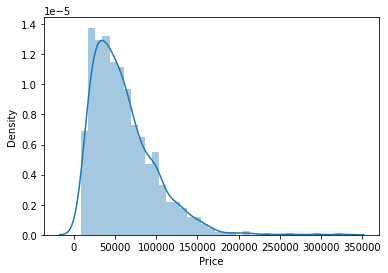

In [12]:
sns.distplot(df["Price"])

### Data is skewed

<AxesSubplot:>

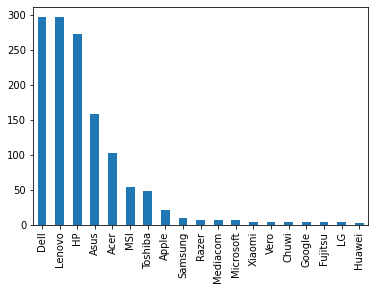

In [13]:
df["Company"].value_counts().plot(kind = "bar")  #Check for Company wise Laptop Count

#### Lets see if company name affects price

<function matplotlib.pyplot.show(close=None, block=None)>

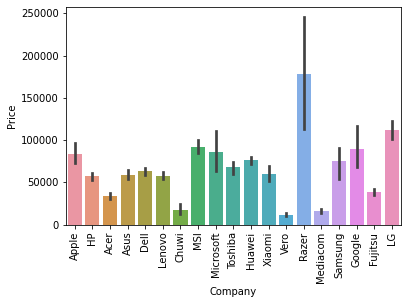

In [14]:
sns.barplot(x = df["Company"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show

#### Check for types of Laptops

<AxesSubplot:>

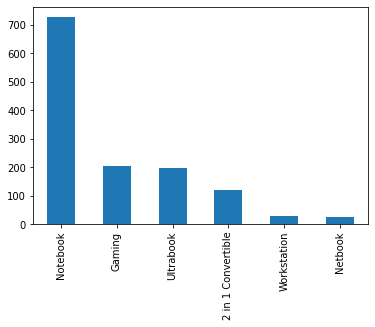

In [15]:
df["TypeName"].value_counts().plot(kind = "bar")

#### Notebook is sold the most

#### Lets see if Type Name affects the price

<function matplotlib.pyplot.show(close=None, block=None)>

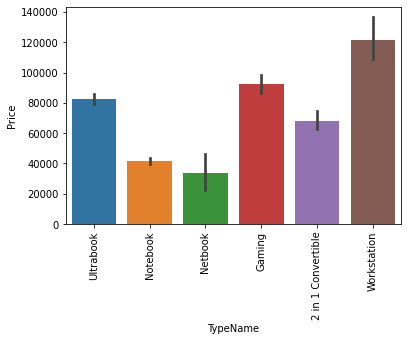

In [16]:
sns.barplot(x = df["TypeName"], y = df["Price"])
plt.xticks(rotation = 'vertical')
plt.show

#### Notebooks are average priced, whereas workstations are heavily priced

#### Check for size of laptops

<AxesSubplot:xlabel='Inches', ylabel='Density'>

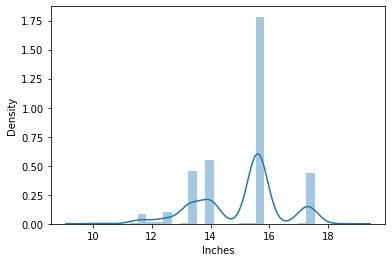

In [17]:
sns.distplot(df["Inches"])

#### we can see maximum laptops are in range (15 to 17) inches

#### Lets see if size affects the price

<AxesSubplot:xlabel='Inches', ylabel='Price'>

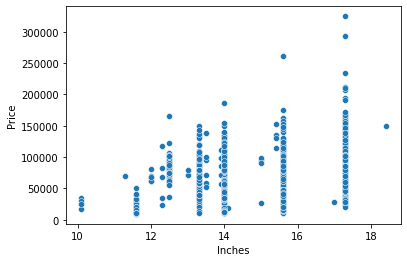

In [18]:
sns.scatterplot(x = df["Inches"], y = df["Price"])

#### maximum laptops are in range of 10,000 - 1,50,000 despite their size is varying
#### So, we can say there is a very low Co-Relation of size with price

### Lets Check for Screen Resolution

In [19]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

### Lets create a column of laptops with touch screen

In [20]:
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0 )

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [22]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
49,Asus,Notebook,17.3,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,24828.48,0
627,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,No OS,2.20,24935.04,0
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,14652.00,1
1109,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,71341.92,0
315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33,44968.32,0
283,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,30849.12,0
598,Dell,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,88977.60,1
836,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,128884.32,0
421,Chuwi,Notebook,12.3,IPS Panel Retina Display 2736x1824,Intel Celeron Quad Core N3450 1.1GHz,6,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.40,23922.72,0
387,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i5 6440HQ 2.6GHz,8,500GB HDD,AMD FirePro W5130M,Windows 10,2.23,72940.32,0


### Lets see how many touch screen laptops we have

<AxesSubplot:>

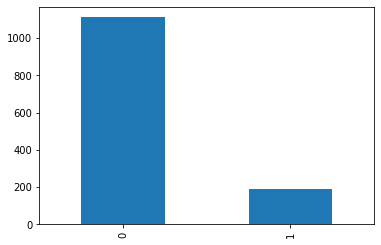

In [23]:
df["TouchScreen"].value_counts().plot(kind = "bar")

### There are only a few laptops with screen touch

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

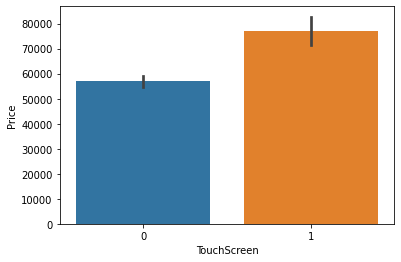

In [24]:
sns.barplot(x = df["TouchScreen"], y = df["Price"])

### We can see touch screen laptops are highly related to price

#### Lets see how many laptops have IPS Panel

In [25]:
df["Ips"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

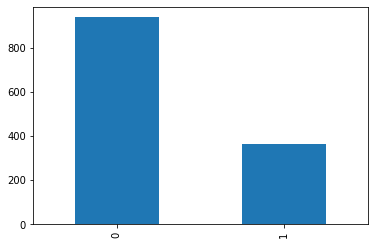

In [27]:
df['Ips'].value_counts().plot(kind = 'bar')

#### Majority of laptops dont have IPS Panel
#### Lets see if this affects the price as well

<AxesSubplot:xlabel='Ips', ylabel='Price'>

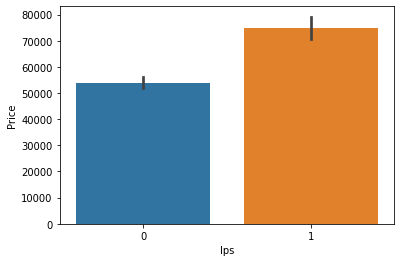

In [28]:
sns.barplot(x = df["Ips"], y = df["Price"])

#### Yes, IPS Panel does affect the price

### Lets check for size with screen resolution

In [29]:
new_df = df["ScreenResolution"].apply(lambda x: x.split('x')[0])

In [30]:
new_df.head()

0    IPS Panel Retina Display 2560
1                             1440
2                     Full HD 1920
3    IPS Panel Retina Display 2880
4    IPS Panel Retina Display 2560
Name: ScreenResolution, dtype: object

In [31]:
import re

df['X_res'] = new_df.str.replace(" ","").str.findall('\d{3,4}').apply(lambda x: x[0])

In [32]:
df["ScreenResolution"].apply(lambda x: x.split('x')[1])

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: ScreenResolution, Length: 1303, dtype: object

In [33]:
df["Y_res"] = df["ScreenResolution"].apply(lambda x: x.split('x')[1])

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [35]:
df.insert(loc=13,column='X_res',value = df['X_res'], allow_duplicates=True)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,2560,1600


In [37]:
df = df.loc[:, ~df.columns.duplicated(keep = 'first')]

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [40]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [42]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [43]:
df["PPI"] = ((df["X_res"]**2) + (df["Y_res"]**2))**0.5 / df["Inches"].astype("float")

In [44]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [45]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

### Lets drop ScreenResolution, X_res, Y_res, Inches columns now

In [46]:
df.drop(["Inches","X_res",'Y_res',"ScreenResolution"], axis = 1, inplace = True)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### Lets check for CPU Column

In [48]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [49]:
df["CPU Name"] = df["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [51]:
def fetch_processor(text):
    
    if text == "Intel Core i3" or text == "Intel Core i5" or text == "Intel Core i7":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD"

In [52]:
df["Cpu Brand"] = df["CPU Name"].apply(fetch_processor)

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CPU Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [54]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,CPU Name,Cpu Brand
559,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,32921.7120,0,0,100.454670,Intel Core i3,Intel Core i3
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
81,Apple,Ultrabook,Intel Core i5 1.3GHz,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,80452.8000,0,1,226.415547,Intel Core i5,Intel Core i5
186,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.1600,1,0,282.423996,Intel Core i7,Intel Core i7
1063,Dell,Notebook,Intel Core i7 7500U 2.7GHz,16,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32,52746.6672,0,0,141.211998,Intel Core i7,Intel Core i7
185,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 150MX,Windows 10,2.77,82530.7200,1,0,127.335675,Intel Core i7,Intel Core i7
459,HP,Notebook,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.50,34093.8720,0,0,106.113062,Intel Core i3,Intel Core i3
252,Asus,Notebook,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68,24988.3200,0,0,100.454670,AMD A9-Series 9420,AMD
1108,HP,Notebook,AMD A6-Series 9220 2.5GHz,4,1TB HDD,AMD Radeon R4,Windows 10,2.10,21205.4400,0,0,141.211998,AMD A6-Series 9220,AMD
111,Dell,Ultrabook,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.1200,1,0,276.053530,Intel Core i7,Intel Core i7


<AxesSubplot:>

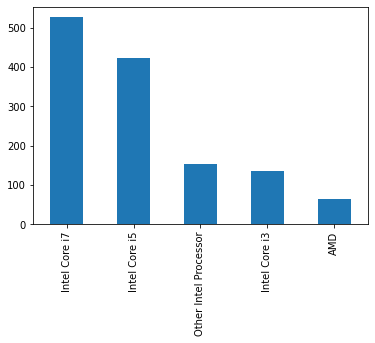

In [55]:
df["Cpu Brand"].value_counts().plot(kind = 'bar')

<function matplotlib.pyplot.show(close=None, block=None)>

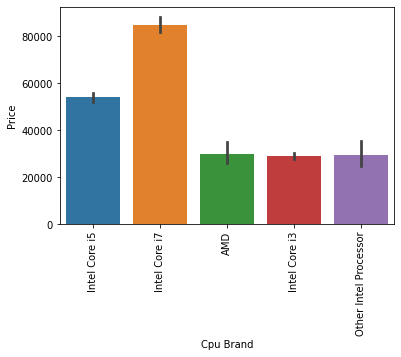

In [56]:
sns.barplot(x = df["Cpu Brand"], y = df["Price"])
plt.xticks(rotation = 'vertical')
plt.show

### Processor is highly affecting or price

In [57]:
df.drop(['Cpu', 'CPU Name'], axis =1, inplace = True)

In [58]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### Check RAM

<AxesSubplot:>

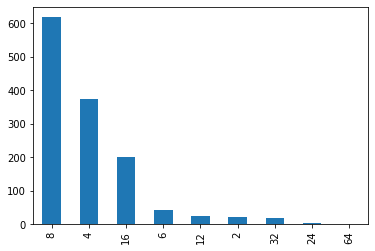

In [59]:
df["Ram"].value_counts().plot(kind = 'bar')

<function matplotlib.pyplot.show(close=None, block=None)>

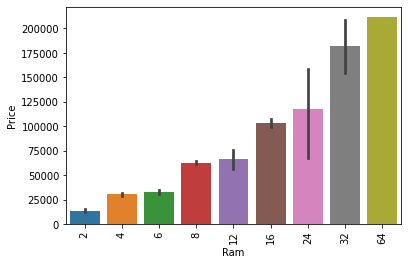

In [60]:
sns.barplot(x = df["Ram"], y = df["Price"])
plt.xticks(rotation = 'vertical')
plt.show

### Strong Positive Linear CR

### Check Memory Column

In [61]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [62]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [64]:
df.drop("Memory", axis = 1, inplace = True)

### Check CR

In [65]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [66]:
df.drop(["Hybrid","Flash_Storage"], axis = 1, inplace = True)

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### Check GPU Column

In [68]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [69]:
df["Gpu"].apply(lambda x: x.split()[0])

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1303, dtype: object

In [70]:
df["Gpu Brand"] = df["Gpu"].apply(lambda x: x.split()[0])

In [71]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [72]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

<AxesSubplot:>

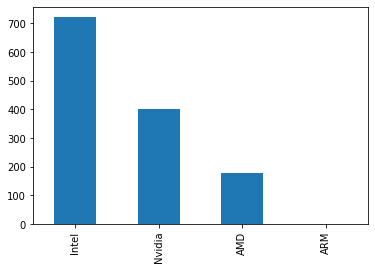

In [73]:
df["Gpu Brand"].value_counts().plot(kind = 'bar')

In [74]:
df[df["Gpu Brand"] =="ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD,0,0,ARM


In [75]:
df = df[df["Gpu Brand"] !="ARM"]

<AxesSubplot:>

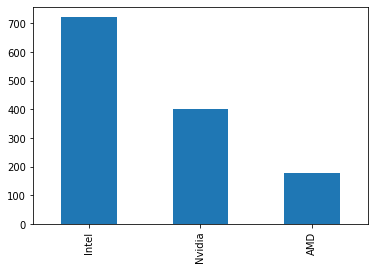

In [76]:
df["Gpu Brand"].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

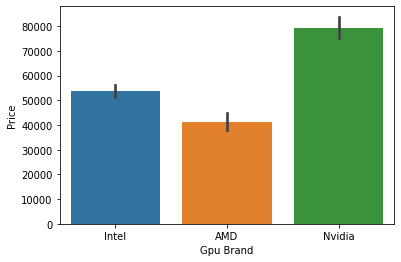

In [77]:
sns.barplot(x = df["Gpu Brand"], y = df["Price"])

In [78]:
df.drop("Gpu", axis = 1, inplace=True)

In [79]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### Check OpSys

In [80]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

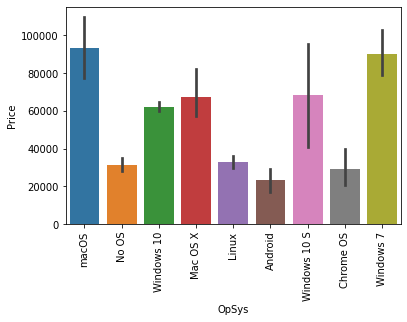

In [81]:
sns.barplot(x = df["OpSys"], y = df["Price"])
plt.xticks(rotation = 'vertical')
plt.show

In [82]:
def cat_os(inp):
    
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return "Windows"
    
    elif inp == 'macOS' or inp == 'Mac OS X':
        return "Mac"
    
    else:
        return 'Others/No Os/Linux'

In [83]:
df['os'] = df["OpSys"].apply(cat_os)

<AxesSubplot:>

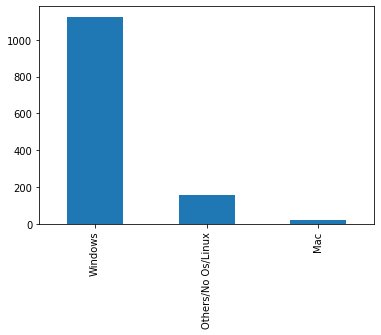

In [84]:
df['os'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='os', ylabel='Price'>

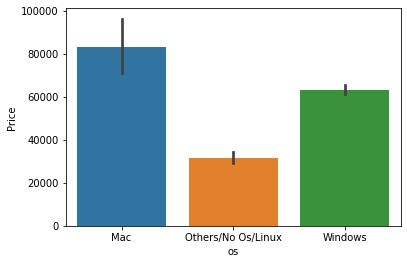

In [85]:
sns.barplot(x = df['os'], y = df["Price"])

### OS is Strongly affecting the price

In [86]:
df.drop('OpSys', axis = 1, inplace=True)

### check Weight column

<AxesSubplot:xlabel='Weight', ylabel='Density'>

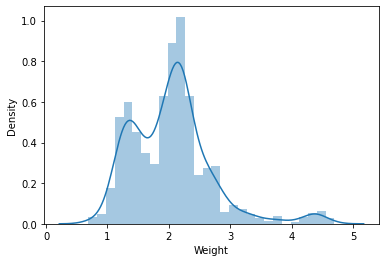

In [87]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

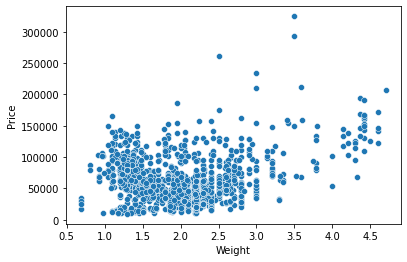

In [88]:
sns.scatterplot(x = df["Weight"], y = df["Price"])

### Weak Linear Relationship

In [89]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
Ips            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

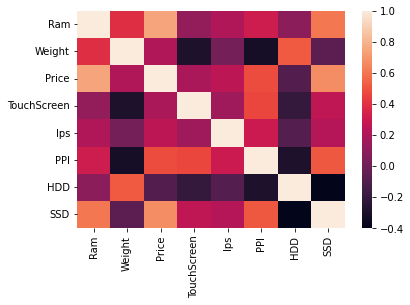

In [90]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Price', ylabel='Density'>

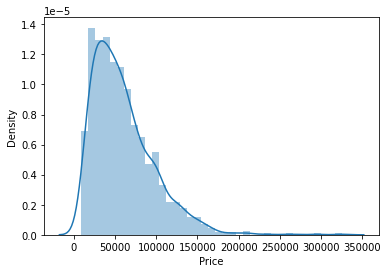

In [91]:
sns.distplot(df["Price"])

### skewed data, so use log transformation

<AxesSubplot:xlabel='Price', ylabel='Density'>

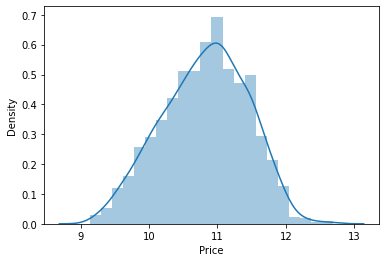

In [92]:
sns.distplot(np.log(df["Price"]))

In [93]:
df = pd.get_dummies(df, columns=["Company","TypeName","Gpu Brand","os","Cpu Brand"])

In [94]:
x = df.drop("Price", axis = 1)
y = np.log(df["Price"])

In [95]:
x

,Ram,Weight,TouchScreen,Ips,PPI,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,Gpu Brand_Intel,Gpu Brand_Nvidia,os_Mac,os_Others/No Os/Linux,os_Windows,Cpu Brand_AMD,Cpu Brand_Intel Core i3,Cpu Brand_Intel Core i5,Cpu Brand_Intel Core i7,Cpu Brand_Other Intel Processor
0,8,1.37,0,1,226.983005,0,128,0,1,0,...,1,0,1,0,0,0,0,1,0,0
1,8,1.34,0,0,127.677940,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,16,1.83,0,1,220.534624,0,512,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,8,1.37,0,1,226.983005,0,256,0,1,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [96]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1302 non-null   int32  
 1   Weight                           1302 non-null   float64
 2   TouchScreen                      1302 non-null   int64  
 3   Ips                              1302 non-null   int64  
 4   PPI                              1302 non-null   float64
 5   HDD                              1302 non-null   int64  
 6   SSD                              1302 non-null   int64  
 7   Company_Acer                     1302 non-null   uint8  
 8   Company_Apple                    1302 non-null   uint8  
 9   Company_Asus                     1302 non-null   uint8  
 10  Company_Chuwi                    1302 non-null   uint8  
 11  Company_Dell                     1302 non-null   uint8  
 12  Company_Fujitsu     

In [97]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

### Model Training

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=2)

In [99]:
lin_reg_model = LinearRegression()

In [100]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [101]:
y_pred_train = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("mse : ",mse)

mae = mean_absolute_error(y_train, y_pred_train)
print("mse : ",mae)

rmse = np.sqrt(mse)
print("mse : ",rmse)

R2 = r2_score(y_train, y_pred_train)
print("R2 : ",R2)

mse :  0.06474767865691076
mse :  0.19854244057480105
mse :  0.2544556516505593
R2 :  0.833974957570625


In [102]:
y_pred_test = lin_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("mse : ",mse)

mae = mean_absolute_error(y_test, y_pred_test)
print("mse : ",mae)

rmse = np.sqrt(mse)
print("mse : ",rmse)

R2 = r2_score(y_test, y_pred_test)
print("R2 : ",R2)

mse :  0.07370698688393838
mse :  0.21017827953018886
mse :  0.27149030716388084
R2 :  0.8073277450155087


In [103]:
 from sklearn.ensemble import RandomForestRegressor

In [104]:
ens_model_reg = RandomForestRegressor()

In [105]:
ens_model_reg.fit(x_train,y_train)

RandomForestRegressor()

In [106]:
y_pred_train = ens_model_reg.predict(x_train)

In [107]:


mse = mean_squared_error(y_train, y_pred_train)
print("mse : ",mse)

mae = mean_absolute_error(y_train, y_pred_train)
print("mae : ",mae)

rmse = np.sqrt(mse)
print("rmse : ",rmse)

R2 = r2_score(y_train, y_pred_train)
print("R2 : ",R2)

mse :  0.00750976065786592
mae :  0.0641137930895391
rmse :  0.08665887524002328
R2 :  0.9807435825079798


In [108]:
y_pred_test = ens_model_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("mse : ",mse)

mae = mean_absolute_error(y_test, y_pred_test)
print("mse : ",mae)

rmse = np.sqrt(mse)
print("mse : ",rmse)

R2 = r2_score(y_test, y_pred_test)
print("R2 : ",R2)

mse :  0.04358652799786428
mse :  0.15469963705188633
mse :  0.2087738680914455
R2 :  0.8860635200090755


### Test Array

In [109]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1302 non-null   int32  
 1   Weight                           1302 non-null   float64
 2   TouchScreen                      1302 non-null   int64  
 3   Ips                              1302 non-null   int64  
 4   PPI                              1302 non-null   float64
 5   HDD                              1302 non-null   int64  
 6   SSD                              1302 non-null   int64  
 7   Company_Acer                     1302 non-null   uint8  
 8   Company_Apple                    1302 non-null   uint8  
 9   Company_Asus                     1302 non-null   uint8  
 10  Company_Chuwi                    1302 non-null   uint8  
 11  Company_Dell                     1302 non-null   uint8  
 12  Company_Fujitsu     

In [110]:
project_data =  {"columns": x.columns}
project_data

{'columns': Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'PPI', 'HDD', 'SSD',
        'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
        'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
        'Company_Huawei', 'Company_LG', 'Company_Lenovo', 'Company_MSI',
        'Company_Mediacom', 'Company_Microsoft', 'Company_Razer',
        'Company_Samsung', 'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi',
        'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
        'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
        'Gpu Brand_AMD', 'Gpu Brand_Intel', 'Gpu Brand_Nvidia', 'os_Mac',
        'os_Others/No Os/Linux', 'os_Windows', 'Cpu Brand_AMD',
        'Cpu Brand_Intel Core i3', 'Cpu Brand_Intel Core i5',
        'Cpu Brand_Intel Core i7', 'Cpu Brand_Other Intel Processor'],
       dtype='object')}

In [111]:
Ram = 16
Weight = 2
TouchScreen = 0
Ips = 0
PPI = 150
HDD = 0
SSD = 512    


Company = 'Acer'
TypeName = 'Gaming'
Gpu_Brand = 'AMD'
os = 'Mac'
Cpu_Brand = 'Intel Core i5'


Company = 'Company_' + Company
TypeName = 'TypeName_' + TypeName
Gpu_Brand = 'Gpu Brand_' + Gpu_Brand
os = 'os_' + os
Cpu_Brand = 'Cpu Brand_' + Cpu_Brand

Company_index = np.where(project_data['columns'] == Company)[0][0]

TypeName_index = np.where(project_data['columns'] == TypeName)[0][0]

Gpu_Brand_index = np.where(project_data['columns'] == Gpu_Brand)[0][0]

os_index = np.where(project_data['columns'] == os)[0][0]

Cpu_Brand_index = np.where(project_data['columns'] == Cpu_Brand)[0][0]


test_array = np.zeros(x.shape[1])
test_array[0] = Ram
test_array[1] = Weight
test_array[2] = TouchScreen
test_array[3] = Ips
test_array[4] = PPI
test_array[5] = HDD
test_array[6] = SSD
test_array[Company_index] = 1
test_array[TypeName_index] = 1
test_array[Gpu_Brand_index] = 1
test_array[os_index] = 1
test_array[Cpu_Brand_index] = 1

print(test_array)

predicted_charge = np.around(ens_model_reg.predict([test_array])[0],3)
Predicted_charge = np.around(np.exp(predicted_charge),3)

print("Predicted Charge is Rs: ", Predicted_charge)

[ 16.   2.   0.   0. 150.   0. 512.   1.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
   0.   0.   0.   0.   1.   0.   0.   1.   0.   0.   0.   0.   1.   0.
   0.]
Predicted Charge is Rs:  99309.846


### Pickle Files

In [112]:
with open("model.pkl", 'wb') as f:
    pickle.dump(ens_model_reg,f)

In [113]:
project_data =  {"columns": x.columns.to_list()}
project_data

{'columns': ['Ram',
  'Weight',
  'TouchScreen',
  'Ips',
  'PPI',
  'HDD',
  'SSD',
  'Company_Acer',
  'Company_Apple',
  'Company_Asus',
  'Company_Chuwi',
  'Company_Dell',
  'Company_Fujitsu',
  'Company_Google',
  'Company_HP',
  'Company_Huawei',
  'Company_LG',
  'Company_Lenovo',
  'Company_MSI',
  'Company_Mediacom',
  'Company_Microsoft',
  'Company_Razer',
  'Company_Samsung',
  'Company_Toshiba',
  'Company_Vero',
  'Company_Xiaomi',
  'TypeName_2 in 1 Convertible',
  'TypeName_Gaming',
  'TypeName_Netbook',
  'TypeName_Notebook',
  'TypeName_Ultrabook',
  'TypeName_Workstation',
  'Gpu Brand_AMD',
  'Gpu Brand_Intel',
  'Gpu Brand_Nvidia',
  'os_Mac',
  'os_Others/No Os/Linux',
  'os_Windows',
  'Cpu Brand_AMD',
  'Cpu Brand_Intel Core i3',
  'Cpu Brand_Intel Core i5',
  'Cpu Brand_Intel Core i7',
  'Cpu Brand_Other Intel Processor']}

In [114]:
project_data["columns"][7]

'Company_Acer'

In [115]:
with open("project_data.json", "w") as f:
    json.dump(project_data,f)